In [2]:
!pip install geopandas

     ---------------------------------------- 1.1/1.1 MB 10.0 MB/s eta 0:00:00
     ---------------------------------------- 5.7/5.7 MB 12.7 MB/s eta 0:00:00
     --------------------------------------- 22.7/22.7 MB 10.9 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 12.3 MB/s eta 0:00:00


In [3]:
#for data interpretation
import geopandas as gpd
import numpy as np
import pandas as pd

# for plot and graphs
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# for download and decompress the dataset
import os, zipfile, glob, io, requests

In [12]:
#plotting administrative boundaries
def plot_boundary(df, ax, color='none', edgecolor='black'):
    df.plot(ax=ax, color=color, edgecolor=edgecolor)
    
#plots features
def plot_feature(df, ax, column, edgecolor='black', cmap='tab20'):
    df.plot(ax=ax, column=column, edgecolor=edgecolor, cmap=cmap, legend=True)
    
#clips dataset to give neccessary data like only India's data
def clip_df(df_complete, df_n):
    return df_complete.clip(df_n)

#standardise column names
def column_std(df):
    return df.columns.str.lower()

In [26]:
climate_df = gpd.read_file('IPCC_ClimateZoneMap_Vector.geojson')
climate_df.head()

,CLASS_NAME,geometry
0,0,"MULTIPOLYGON (((-37.65000 83.50000, -37.65000 ..."
1,0,"MULTIPOLYGON (((-38.75000 83.40000, -38.75000 ..."
2,0,"MULTIPOLYGON (((-38.60000 83.40000, -38.60000 ..."
3,0,"MULTIPOLYGON (((-37.15000 83.40000, -37.15000 ..."
4,5,"MULTIPOLYGON (((-40.40000 83.40000, -40.40000 ..."


In [34]:
# load the json with geopandas
climate_df = gpd.read_file('IPCC_ClimateZoneMap_Vector.geojson')
climate_df.set_crs(epsg=4326, inplace=True)

# standardizing column names
climate_df.columns = climate_df.columns.str.lower()

print('World Climate Zones dataset has %2d rows and %2d columns.' %(climate_df.shape[0], climate_df.shape[1]))

World Climate Zones dataset has 26165 rows and  2 columns.


In [35]:
# Replacing the data that was in codes
classification =  {'1': 'Tropical montane', '2' : 'Tropical wet', 
                   '3': 'Tropical moist', '4': 'Tropical dry', 
                   '5': 'Warm temperate moist', '6': 'Warm temperate dry',
                   '7': 'Cool temperate moist', '8': 'Cool temperate dry',
                   '9': 'Boreal moist', '10': 'Boreal dry', '11' : 'Polar moist',
                   '12': 'Polar dry'}

# renaming class_name
climate_df.class_name = climate_df.class_name.astype('str').replace(classification)

# removing oceans
climate_df =  climate_df.loc[climate_df.class_name != '0']

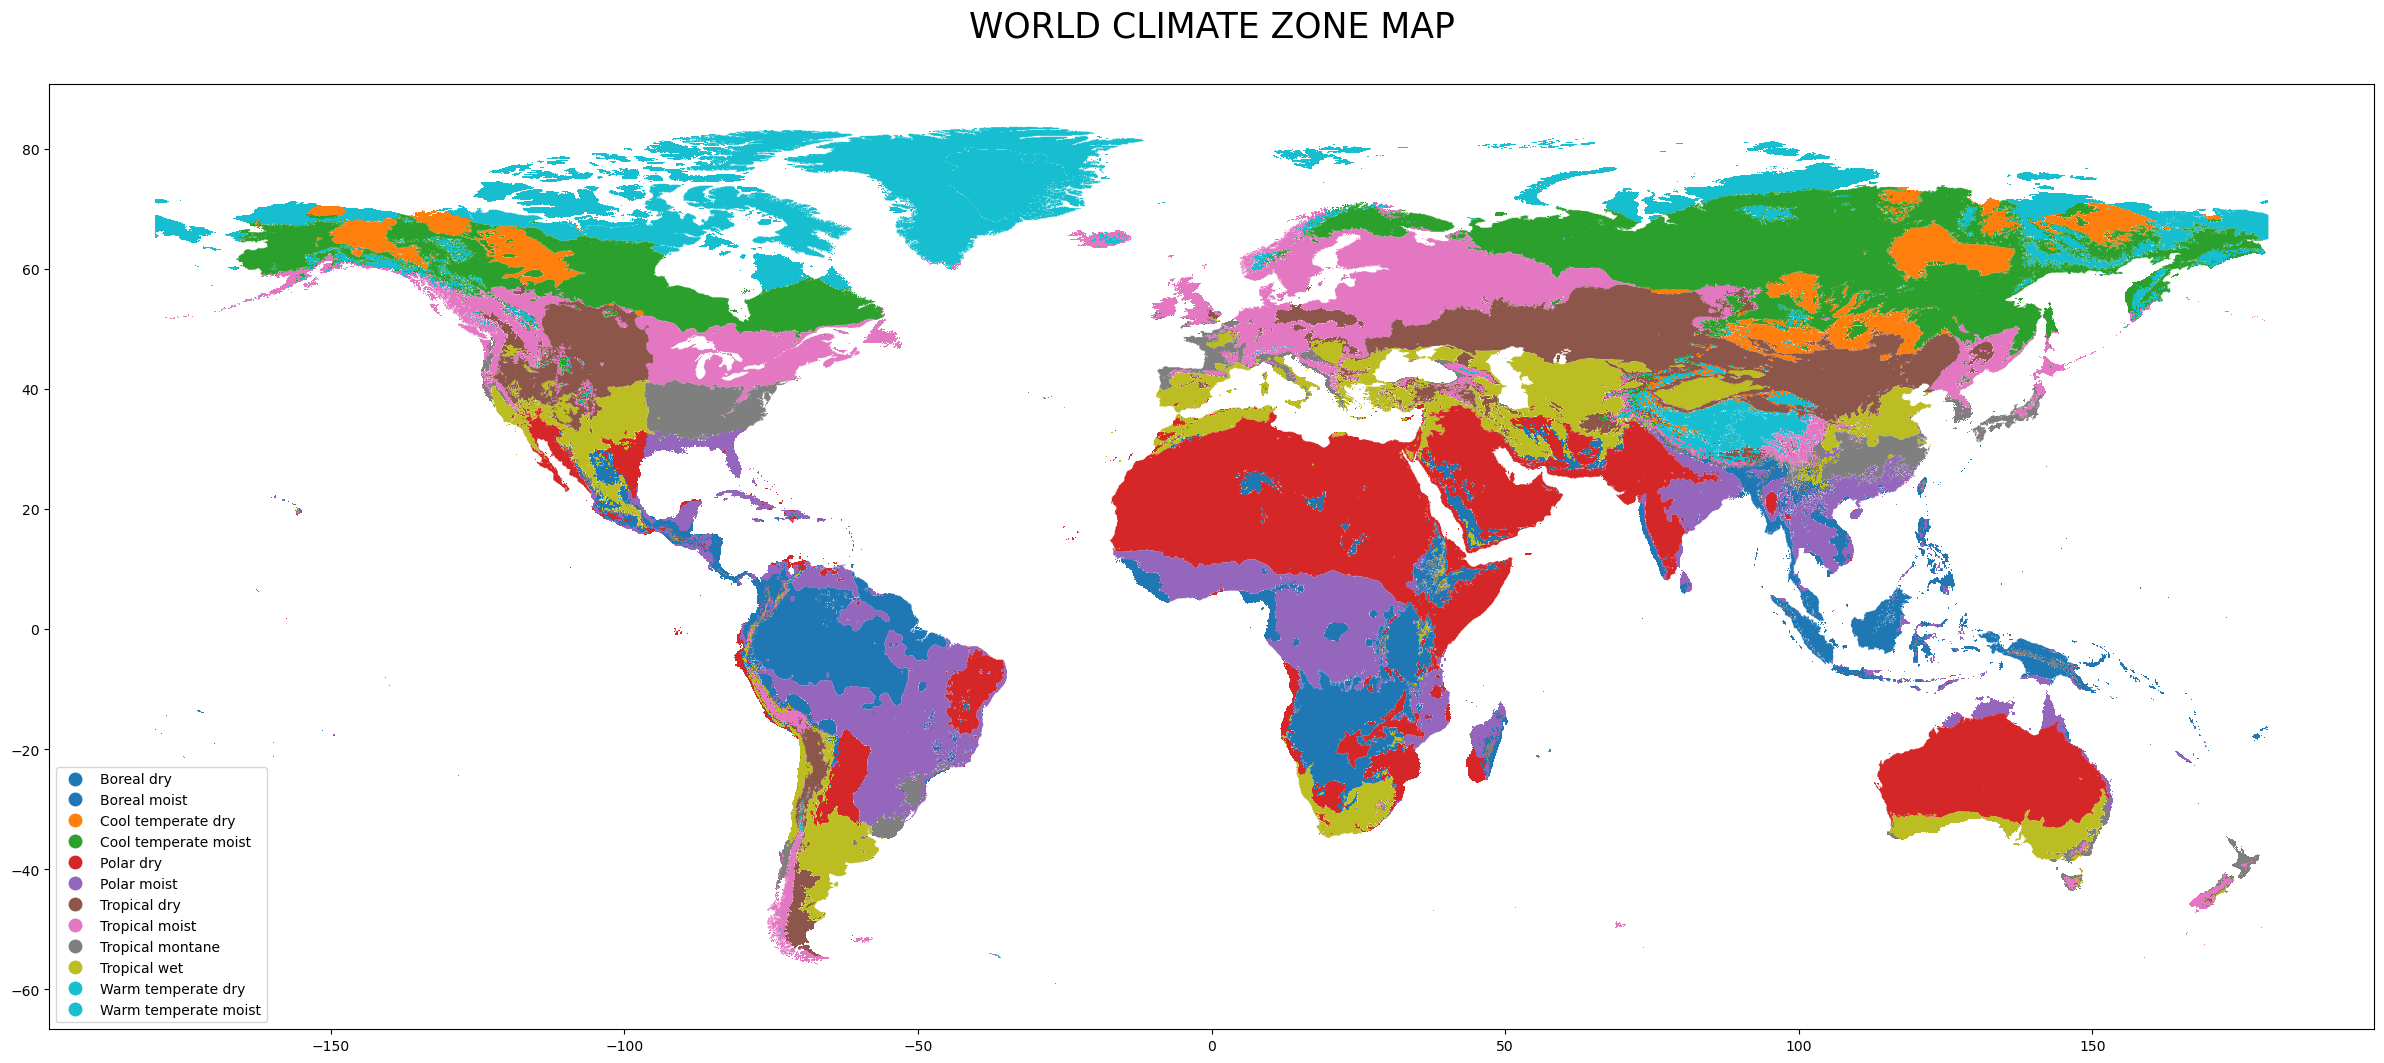

In [36]:
# plotting the map
ax = climate_df.plot(figsize = (30,15), column = 'class_name', legend= True, 
                     legend_kwds= {'loc': 'lower left'})
ax.set_title('WORLD CLIMATE ZONE MAP\n', fontsize=25)
plt.show()

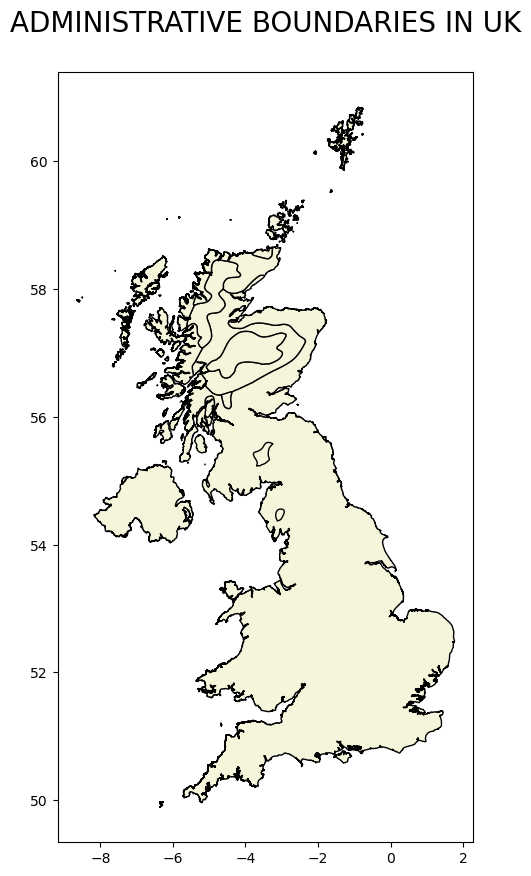

In [39]:
boundary_df = gpd.read_file('GBR_AL2_United_Kingdom_GEZ.json')
boundary_df = boundary_df[['name', 'geometry']]

# fix the georeference! the map seems to be cliped from a bad reference
boundary_df.to_crs(5389, inplace=True)
boundary_df.to_crs(4326, inplace=True) # now is WGS84 again!

# Plotting the map
ax = boundary_df.plot(figsize=(15,10), color= 'beige', edgecolor= 'black')
ax.set_title('ADMINISTRATIVE BOUNDARIES IN UK\n', fontsize=20)
plt.show()

In [42]:
# creating dataframe
UKClimate_df = climate_df.clip(boundary_df)
UKClimate_df = UKClimate_df.reset_index(drop=True)

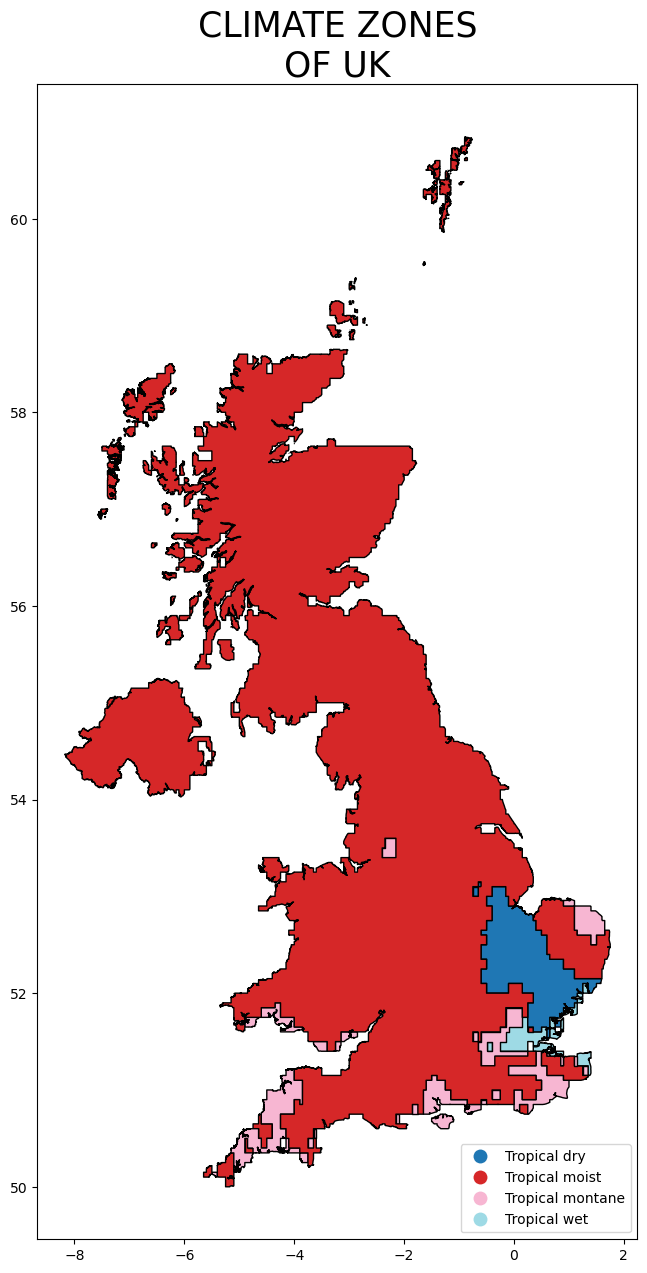

In [43]:
# Plotting in the maps
ax = UKClimate_df.plot(figsize=(10,15), edgecolor='black', column = 'class_name', cmap='tab20',
                                    legend= True, legend_kwds={'loc': 'lower right'})
ax.set_title('CLIMATE ZONES\nOF UK', fontsize=25)
plt.show()